ISRC Python Workshop: Visualization with Matplotlib

___Visualization with Matplotlib and Seaborn___

<hr>

@author: Zhiya Zuo

@email: zhiya-zuo@uiowa.edu

<hr>

In [108]:
import numpy as np

The following imports the main module in package `matplotlib`. Note that `%matplotlib inline` means we want the plot to be inline in our notebook instead of getting a pop-up windows.

In [109]:
from matplotlib import pyplot as plt
%matplotlib inline

<hr>

#### Introduction

Visualization is one of the most important things of data analysis. Besides just producing ___readable___ plots, we should make an effort to improve the overall attractiveness of the plots. `matplotlib` is a powerful package for ___Python___ users. Let's start with an example.

First we generate sample data

In [110]:
X_arr = np.arange(10)
Y_arr = 3*X_arr + 2 + np.random.random(size=X_arr.size) # linear with some noise
print(X_arr)
print(Y_arr)

[0 1 2 3 4 5 6 7 8 9]
[ 2.01486134  5.25099205  8.51321917 11.03441301 14.57193933 17.29545064
 20.35492655 23.4540255  26.15927674 29.59403265]


To plot a simple scatter plot, we can use `plt.scatter()` function

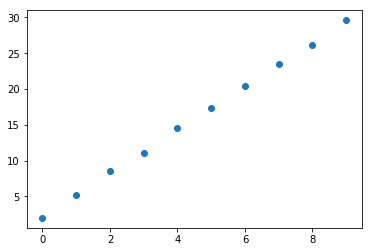

In [111]:
plt.scatter(X_arr, Y_arr)

See how easy this is? However, this is still too simple - we do not even have X or Y axis labels. Further we may want to change the scatter markers. Let's get a better plot!

Text(0.5,1,'My First Plot')

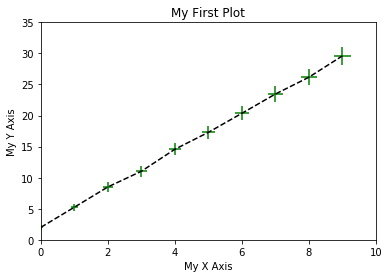

In [112]:
# Use `+` as marker; color set as `g` (green); size proportion to Y values
plt.scatter(X_arr, Y_arr, marker='+', c='g', s=Y_arr*10) 
# How about adding a line to it? Let's use `plt.plot()`
# set line style to dashed; color as `k` (black) 
plt.plot(X_arr, Y_arr, linestyle='dashed', color='k')
# set x/y axis limits: first two are xlow and xhigh; last two are ylow and yhigh
plt.axis([0, 10, 0, 35])
# set x/y labels
plt.xlabel('My X Axis')
plt.ylabel('My Y Axis')
# set title
plt.title('My First Plot')

##### Anatomy of a Figure

Before we go deeper, let's take a look at the structure of a figure in `matplotlib`:

<img width=700 src="https://matplotlib.org/_images/anatomy1.png">

As you can see, we have done things for many of the elements. There's no need to memorize them, though. We can always Google and find information on specific parts that we want to update.

---

#### Coding style (personal recommendation)

I myself prefer the following way of getting a figure with `matplotlib`:

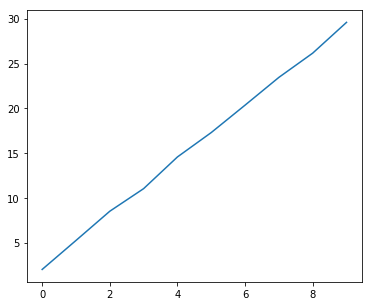

In [113]:
# `plt.subplots()` returns a figure object (which is the whole thing as shown above)
# and `axes` that control specific plots in the figure.
# Here our "subplots" layout is by default 1 row and 1 col and therefore 1 plot
fig, ax = plt.subplots()
# Setting figure size
fig.set_figwidth(6)
fig.set_figheight(5)
# plot should be done on the `axis`: ax
ax.plot(X_arr, Y_arr)

Applying what we did earlier:

Text(0.5,1,'My First Plot')

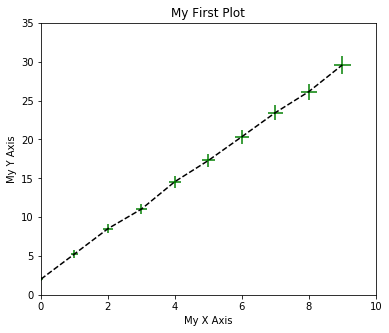

In [114]:
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(5)
# What we just did, applying to `ax`
ax.scatter(X_arr, Y_arr, marker='+', c='g', s=Y_arr*10) 
ax.plot(X_arr, Y_arr, linestyle='dashed', color='k')
ax.axis([0, 10, 0, 35])
ax.set_xlabel('My X Axis')
ax.set_ylabel('My Y Axis')
ax.set_title('My First Plot')

This is especially useful when handling multiple plots in one figure. Let's use an example of 4 plots: 2x2 layout

(2, 2)

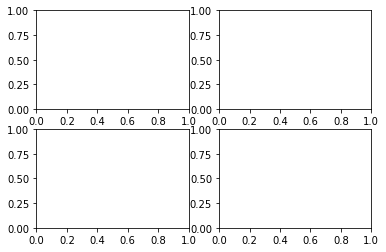

In [115]:
# Now the returned `ax` would be array with a shape a 2x2
fig, ax_arr = plt.subplots(nrows=2, ncols=2)
ax_arr.shape

We can plot in each of them by adding `plot` to each of the `axes` using a `for` loop. (In reality we should plot different things in different subplots)

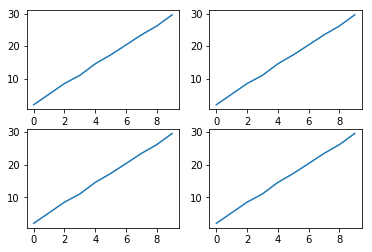

In [116]:
# Now the returned `ax` would be array with a shape a 2x2
fig, ax_arr = plt.subplots(nrows=2, ncols=2)
for ax_row in ax_arr:
    for ax in ax_row:
        ax.plot(X_arr, Y_arr)

---

#### Different plots

Instead of the simpletst scatter/line plots, there are of course other options.

##### Histogram

Let's use a Gaussian distribution for illustration

In [117]:
mu, sigma = 15, 1
gaussian_arr = np.random.normal(mu, sigma, size=10000)
np.mean(gaussian_arr), np.std(gaussian_arr, ddof=1)

(15.018546230524336, 0.9973813325728333)

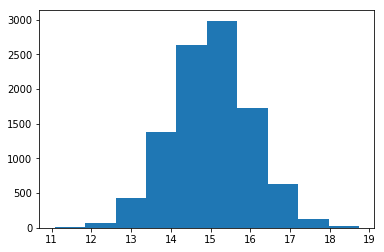

In [118]:
fig, ax = plt.subplots()
# `hist()` will return something but we usually do not need.
freq_arr, bin_arr, _ = ax.hist(gaussian_arr)

We can actually customize and make it prettier

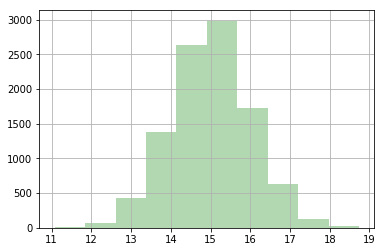

In [119]:
fig, ax = plt.subplots()
# Facecolor set to green; transparency (`alpha`) level: 30%
freq_arr, bin_arr, _ = ax.hist(gaussian_arr, facecolor='g', alpha=0.3)
# Add grid
ax.grid()

##### Boxplot

With the guaussian data, we can use a different form: box plot

{'boxes': [<matplotlib.lines.Line2D at 0x112b1aba8>],
 'caps': [<matplotlib.lines.Line2D at 0x1133b8ef0>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x11303a400>],
 'medians': [<matplotlib.lines.Line2D at 0x1133b8c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x112b1a2b0>,
  <matplotlib.lines.Line2D at 0x112574438>]}

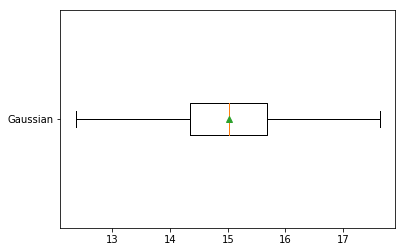

In [120]:
fig, ax = plt.subplots()
ax.boxplot(gaussian_arr, 
           vert=False,  # verticle
           showfliers=False, # do not show outliers
           showmeans=True, # show the mean
           labels=['Gaussian'] # group name (label)
          )

##### Bar chart

Random data for bar chart input:

In [121]:
bar_arr = np.array(['Spring', 'Summer', 'Fall', 'Winder'])
freq_arr = np.random.randint(0, 100, 4) # generate 4 random integers for bar chart
freq_arr

array([36, 16, 67, 73])

We can also add error bars:

In [122]:
yerr_arr = np.random.randint(5, 10, 4)
yerr_arr

array([7, 5, 9, 8])

<Container object of 4 artists>

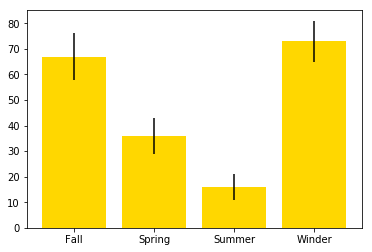

In [123]:
fig, ax = plt.subplots()
ax.bar(bar_arr, freq_arr, # X and Y
       yerr = yerr_arr, # error bars
       color='gold',
      )

##### Group these plots together!

Text(0.5,1,'Bar chart')

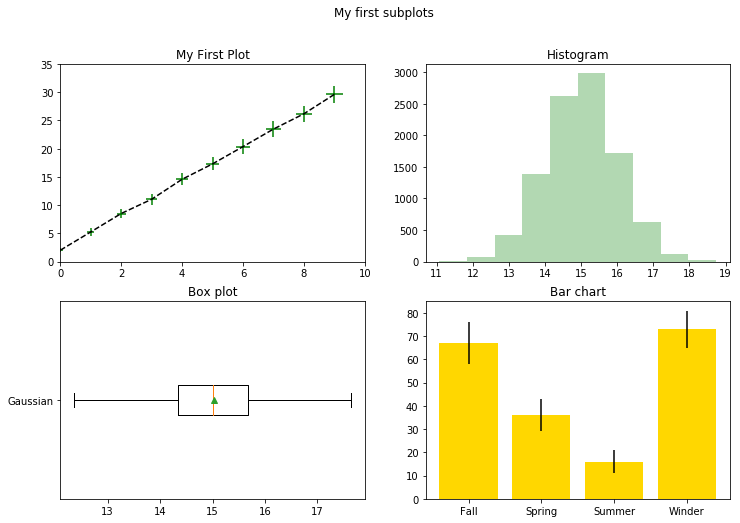

In [124]:
fig, ax_arr = plt.subplots(nrows=2, ncols=2, 
                           # let their scales be different
                           sharex=False, sharey=False)
fig.set_figwidth(12)
fig.set_figheight(8)
# set global title
fig.suptitle("My first subplots")

## first
ax_arr[0, 0].scatter(X_arr, Y_arr, marker='+', c='g', s=Y_arr*10) 
ax_arr[0, 0].plot(X_arr, Y_arr, linestyle='dashed', color='k')
ax_arr[0, 0].axis([0, 10, 0, 35])
ax_arr[0, 0].set_title('My First Plot')
## second 
ax_arr[0, 1].hist(gaussian_arr, facecolor='g', alpha=0.3)
ax_arr[0, 1].set_title('Histogram')
## third
ax_arr[1, 0].boxplot(gaussian_arr, vert=False, showfliers=False,
                     showmeans=True, labels=['Gaussian'])
ax_arr[1, 0].set_title('Box plot')
## last one
ax_arr[1,1].bar(bar_arr, freq_arr, 
                yerr = yerr_arr, color='gold')
ax_arr[1, 1].set_title('Bar chart')

---

#### Seaborn: Made life easier

Finally, I would like to introduce [`seaborn`](https://seaborn.pydata.org/). This package really helps me get some good-looking plots for journal/conference submissions. Specifically, I would like to show you two examples.

In [125]:
import seaborn as sns

##### Example 1: Heatmap

I would use the example of correlataion matrix. First I load a sample data `iris`

In [126]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's get the correlation between the first 3 columns:

In [127]:
corr_df = df[df.columns[:3]].corr()
corr_df

,sepal_length,sepal_width,petal_length
sepal_length,1.000000,-0.11757,0.871754
sepal_width,-0.117570,1.00000,-0.428440
petal_length,0.871754,-0.42844,1.000000


Getting a heatmap in `seaborn` is very straightfoward:

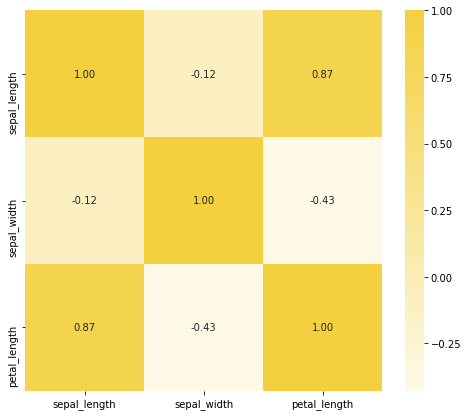

In [128]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(7)
sns.heatmap(corr_df, 
            annot=True, # show the values
            fmt=".2f", # format of the value
            cmap=sns.light_palette("#F4D03F", as_cmap=True), # color map to be used 
            ax=ax # plot on the `ax` we just instaniated
           )

##### Example 2: Linear regression

Using the same dataset, let's plot the bivariate regression between sepal length and width for different species:

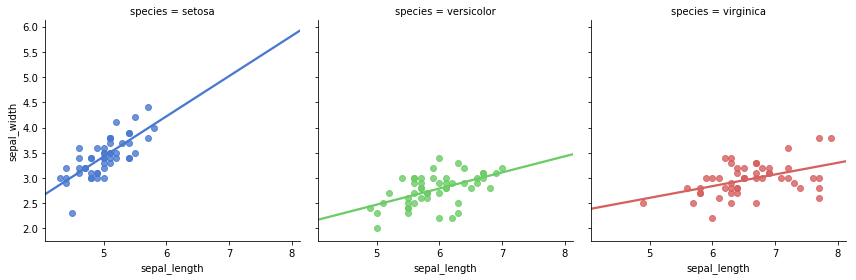

In [129]:
sns.lmplot(x="sepal_length", y="sepal_width", 
           data=df, # the data to be used
           col="species", # seperate data into column based on `species`
           hue="species", # color for each subplot (facet)
           col_wrap=3, # wrap into a new row for every 2 columns
           ci=None, # do not show confidence interval
           palette="muted", # color palette to use
           size=4, # size of each subplot (facet)
          )

Note that `lmplot()` is a wrapper of ['FacetGrid'](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) so we cannot set the `axes` for this figure.

---

#### Some helpful tutorials...

Finally, I list some tutorials that I think will greatly benefit the understanding of the packages mentioend above:

- https://matplotlib.org/users/pyplot_tutorial.html
- https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure
- https://seaborn.pydata.org/examples/index.html